# PyTorch Workflow

Para empezar, hay que recordar nuestras referencias del curso:

* Repositorio de GitHub: https://github.com/mrdbourke/pytorch-deep-learning/
* Notas del curso: https://www.learnpytorch.io/01_pytorch_workflow/
* Tutorial de Básicos de PyTorch: https://pytorch.org/tutorials/beginner/basics/intro.html

Los temas que cubriremos en este módulo serán:

1. Data (Preparar y cargarla)
2. Crear un modelo
3. Entrenar un modelo (Fit data to model)
4. Predicciones y evaluación el modelo (Inference)
5. Guardar y cargar un modelo
6. Creación de un proyecto

Para ello haremos uso de `torch.nn` que contiene todo lo necesario para la creación de gráficas (grafos); esencialmente, las redes neuronales son gráficas

Documentación: https://pytorch.org/docs/stable/nn.html

In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.nn import functional as F
import numpy as np

## 1. Data (Preparing and Loading)

En machine learning (ML) y deep learning (DL), los datos (data) pueden ser de cualquier tipo:

* Excel (Spreedsheet)
* Imágenes
* Videos
* Audios
* ADN
* Texto

Por lo tanto, actualmente ML/DL, a grosso modo, se puede dividir  en 2 partes:

1. Transformar data en su representación numérica
2. Contruir modelos para aprender los patrones de esa representación numérica

### Regresión Lineal

Dentro de ML/DL se utilizan otros términos para referirse al modelo y sus variables que en álgebra lineal:

`y = mx + b` -> `y = wX + b`

| **Variable** | **Descripción** | **Simbología** | **Comparación con Álgebra Lineal** |
|:------------|:----------------|:---------------|:----------------------------------|
| Variable objetivo | Variable que se busca predecir | y | Variable dependiente |
| Variables predictoras | Variables que se utilizan para predecir | X | Variables independientes |
| Gradiente | Parámetros que se ajustan durante el entrenamiento | w | Coeficientes de la ecuación lineal |
| Intersección | Valor que se suma a la combinación lineal | b | Término constante |
| Ecuación | Modelo de regresión lineal | y = wX + b | Ecuación lineal |

#### Notas:

* En álgebra lineal, se busca la solución exacta, mientras que en regresión lineal en ML/DL, se busca la solución óptima que minimize el error.

* En álgebra lineal, las ecuaciones lineales se resuelven de manera exacta, mientras que en ML/DL, se utilizan algoritmos de optimización para ajustar los coeficientes.

* En álgebra lineal, no se considera el ruido o la incertidumbre en los datos, mientras que en ML/DL, se busca robustecer el modelo contra el ruido y la variabilidad en los datos.

### Creación de Data-Set con Datos Conocidos

A continuación crearemos un data set (con datos conocidos) usando regresión lineal

* Declarar los parámetros:

Cuando se trata de ML/DL lo que se suele buscar son los parámetros para un modelo, sin embargo, para este ejemplo nosotros los declararemos:

In [2]:
# Elegir valores arbitrario:
weight = 0.7 # Pendiente m
bias = 0.3 # Ordenada al origen b

* Crear el conjunto de datos X:

Tomando un intervalo, creamos los datos de la variable dependiente X:

In [3]:
# Crear un conjunto de valores para la variable dependiente x:
X = torch.arange(start=0, end=1, step=0.02)
X, X.shape

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
         0.9000, 0.9200, 0.9400, 0.9600, 0.9800]),
 torch.Size([50]))

Sin embargo, para utilizarlos debemos de redimensionarlos:

In [4]:
X = X.unsqueeze(dim=1)
X[:5], X.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 torch.Size([50, 1]))

* Creación del modelo `y = wX + b`

In [5]:
y = weight * X + bias
y[:5], y.shape

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]),
 torch.Size([50, 1]))

In [6]:
len(X), len(y)

(50, 50)

### Separar Data en Training y Testing

Uno de los conceptos más importantes de ML/DL es la separación de data en datasets los cuales tienen distintos propósitos para nuestra red neuronal. En general se pueden clasificar de la siguiente forma:

* Training Set: 60% - 80% de los datos

Utilizado para que nuestro modelo aprenda los patrones de la data

* Validation Set: 10% - 20% de los datos

Usado para ajustar los parámetros del modelo

* Testing Set: 10% - 20% de los datos

Para probar la precisión del modelo

A través de la separación de data en estos datasets y su uso, se trata de llegar a una **generalización**:

La abilidad de un modelo de tener buena presición con data que no ha visto antes

| División         | Propósito                                                                 | Porcentaje del total de datos | ¿Con qué frecuencia se usa?          |
|------------------|---------------------------------------------------------------------------|--------------------------------|---------------------------------------|
| Conjunto de entrenamiento | El modelo aprende de estos datos (como los materiales del curso que estudias durante el semestre). | ~60-80%                       | Siempre                               |
| Conjunto de validación    | El modelo se ajusta con estos datos (como el examen de práctica que tomas antes del examen final). | ~10-20%                       | A menudo, pero no siempre             |
| Conjunto de prueba        | El modelo se evalúa con estos datos para verificar lo que ha aprendido (como el examen final que tomas al final del semestre). | ~10-20%                       | Siempre                               |


Para este ejemplo solo se crearan los datasets de training y testing con 80% y 20% del data respectivamente

* Creación del Intervalo

In [7]:
train_split = int(0.8 * len(X))
train_split

40

* Creación del Training Dataset

In [8]:
X_train, y_train = X[:train_split], y[:train_split]
X_train.shape, y_train.shape

(torch.Size([40, 1]), torch.Size([40, 1]))

* Creación del Testing Dataset:

In [9]:
X_test, y_test = X[train_split:], y[train_split:]
X_test.shape, y_test.shape

(torch.Size([10, 1]), torch.Size([10, 1]))

### Visualizar Data

Es fundamental la visualización de nuestros datos, para tener un mayor entendimiento de ellos

Revisar la documentación de `matplotlib.pyplot`: https://matplotlib.org/stable/tutorials/pyplot.html

In [10]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """
    Grafica los datos de training, testing y compara predicciones
    """

    plt.figure(figsize=(10, 7))

    # Graficar datos de training:
    plt.scatter(train_data, train_labels, c="b", s=4, 
                label="Training Data")
    
    # Graficar datos de testing:
    plt.scatter(test_data, test_labels, c="purple", s=4,
                label="Testing Data")

    # Graficar comparación de predicciones:
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, 
                    label="Predicciones")
    plt.legend(prop={"size":14})
    plt.grid()

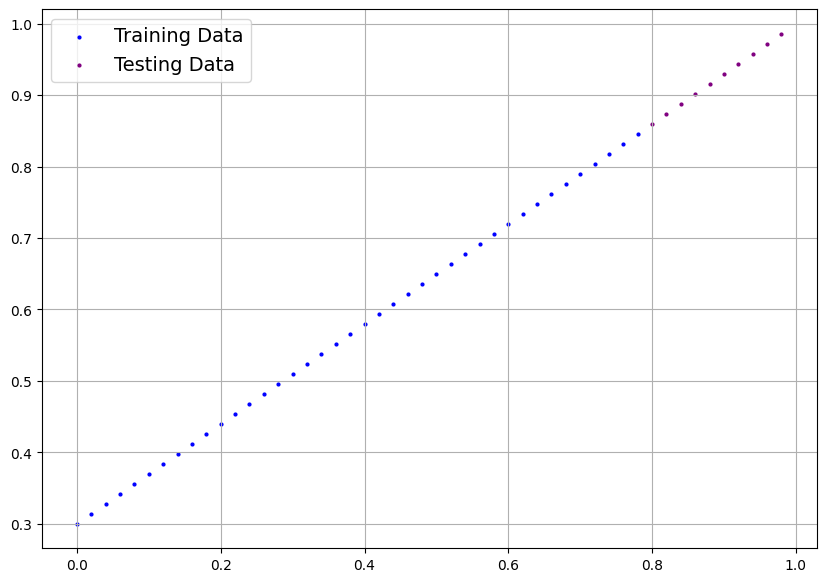

In [11]:
plot_predictions()

En el modelo anterior, no se grafica la comparación debido a que no tenemos predicciones aún; el modelo no es de ML/DL, nosotros fuimos quienes declaramos los parámetros de la regresión lineal

Pero a continuación crearemos nuestro 1er modelo de regresión lineal

## 2. Crear un Modelo

Para crear el módelo hacemos una clase heredando de `torch.nn.Module` o `nn.Module`

Casi todo lo relacionado con redes neuronales en PyTorch debe heredar de `torch.nn.Module` debido a que son los bloques fundamentales para una red neuronal

Documentación de `torch.nn.Module`: https://pytorch.org/docs/stable/generated/torch.nn.Module.html

Documentación de `torch.nn.Parameter`: https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html

Documentación de `torch.randn`: https://pytorch.org/docs/main/generated/torch.randn.html

In [12]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        # Ejecuta el constructor de la clase padre nn.Module
        super().__init__()
        # Inicializar los parámetros del modelo:
        # Creamos como parámetro el peso w (pendiente m)
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True, 
                                                dtype=torch.float))
        # Creamos como parámetro el bias (ordenada al origen b)
        self.bias = nn.Parameter(torch.randn(1, 
                                             requires_grad=True, 
                                             dtype=torch.float))
        
    # El método forward define la computación en el modelo
    # x es el tensor input
    # En concreto se llama forward por Forward Propagation
    def forward(self, x:torch.tensor) -> torch.tensor:
        # Ecuación de regresión lineal simple
        return self.weights * x + self.bias

Este modelo hace lo siguiente:

*  Inicia con valores aleatorios en los parámetros (weights, bias)

* Revisa la data y ajusta los valores de sus parámetros para representar mejor la data o los valores ideales

Es capaz de hacerlo a través de 2 algoritmos de optimización:

1. Gradient Descent:

https://www.ibm.com/think/topics/gradient-descent

Cabe mencionar que este algoritmo es la razón por la cual usamos `requires_grad = True`

2. Backpropagation: 

https://www.ibm.com/think/topics/backpropagation

Revisar la serie de redes neuronales de 3Blue1Brown: 

https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&si=-F5uBL77aVLAEuXT

Cabe mencionar que cuando se crea una subclase de `nn.Module` como nuestro ejemplo `LinearRegressionModel`, necesita sobreescribir `forward` para ser utilizado como el algoritmo que define la computación a realizar por el modelo

### Fundamentos de Construcción de Modelos de PyTorch

* `torch.nn`:

Contiene todas las piezas para crear gráficas computacionales (grafos); una red neuronal puede ser considerada un tipo de grafo

* `torch.nn.Parameter`:

Define los parámetros a aprender por el modelo. Sin embargo, un layer de PyTorch suele cubrir esto por nosotros

* `torch.nn.Module`:

Es la clase base para todos los módulos de redes neuronales, por lo tanto, la mayoría de los modelos deben ser creados como subclases de `torch.nn.Module` heredando de ello.

En caso de crear una subclase a partir de ello, es necesario sobreescribir el método `forward` para definir la computación a realizar por el modelo

* `torch.optim`:

Donde se encuentran los optimizadores de PyTorch. Ayudan optimizando algoritmos como Descenso de Gradiente (`Gradient Descent`)

* `def forward()`:

Todas las subclases de `torch.nn.Module` necesitan sobreescribir este método. Éste define la computación a realizar por el modelo creado

* `torch.utils.data.Dataset`:

Crea un mapa para representar pares de keys (labels) y samples (features). Como imágenes y sus labels asociados

* `torch.utils.data.DataLoader`:

Crea un iterador de Python sobre un torch Dataset; permite iterar sobre nuestra data

Siempre podemos consultar la documentación para aclarar dudas. A continuación se presenta la cheat sheet de PyTorch:

https://pytorch.org/tutorials/beginner/ptcheat.html

### Revisar el Contenido de Nuestro Modelo de PyTorch

Ahora que se ha creado el modelo, podemos revisar los parámetros de nuestro modelo usando `.parameters()`

Debido a que los parámetros se inicializan con valores aleatorios, podemos definir random seed para tener reproducibilidad y los valores no cambien cada que se ejecuta

In [13]:
# Crear una Random Seed
torch.manual_seed(42)

# Crear una instancia del modelo LinearRegressionModel
# Subclase de torch.nn.Module
model0 = LinearRegressionModel()
model0

LinearRegressionModel()

Revisamos los parámetros del modelo con `.parameters()`

In [14]:
model0.parameters()

<generator object Module.parameters at 0x7f6317465b60>

Debido a que entrega un generador con dirección de memoria debemos crear una lista:

In [15]:
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

Podemos listar los parámetros nombrados para entender mejor el modelo usando `.state_dict()`

In [16]:
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Cabe mencionar que `torch.randn(n)` crea un tensor unidimensional que contiene n valores aleatorios

In [17]:
torch.randn(1)

tensor([0.2345])

In [18]:
torch.rand(10), torch.rand(10).shape

(tensor([0.9408, 0.1332, 0.9346, 0.5936, 0.8694, 0.5677, 0.7411, 0.4294, 0.8854,
         0.5739]),
 torch.Size([10]))

Documentación de `torch.randn(n)`: https://pytorch.org/docs/main/generated/torch.randn.html

Regresando a nuestro modelo,

Ahora debemos buscar la forma de aproximar los valores de los parámetros del modelo (inicializados con valores aleatorios) a los definidos manualmente en el primer ejemplo:

In [19]:
print(f"{model0.state_dict()['weights']} -> {weight}")
print(f"{model0.state_dict()['bias']} -> {bias}")

tensor([0.3367]) -> 0.7
tensor([0.1288]) -> 0.3


Mientras estos valores se aproximen más, nuestro modelo tendrá una mejor precisión y por ende, dará mejores predicciones

En concreto, estos son las bases del Deep Learning DL:

* Crear un modelo
* Inicializar sus parámetros con valores aleatorios
* Modificar esos valores para representar mejor nuestra data

### Predicciones Antes del Entrenamiento

Para revisar la presición de nuestro modelo, podemos utilizar el método `torch.inference_mode()` utilizando la data de prueba `X_test` y comparando los resultados con los resultados deseados `y_test`

Cuando se pasa data al modelo, la correrá usando el método `forward()`

Documentación de `inference mode`: 
* https://pytorch.org/cppdocs/notes/inference_mode.html

* https://pytorch.org/docs/stable/generated/torch.autograd.grad_mode.inference_mode.html

* https://x.com/PyTorch/status/1437838231505096708?mx=2


In [20]:
y_preds = model0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

Como se muestra anteriormente, el gradiente se sigue trackeando al realizar predicciones, pero esto no es necesario por lo cual se alentan los cálculos; cuando se trabaja con grandes cantidades de datos ésto se vuelve evidente y repercute en los tiempos de ejecución.

Para evitar seguir trackeando los gradientes se hace uso de `torch.inference_mode()`.

Al utilizar `torch.inference_mode()` se utiliza el `context manager` (administrador de contexto) para evitar trackear los gradientes de los datos, ya que no son necesario para hacer inferencias, solo para el entrenamiento, de esta forma se agilizan los cálculos realizados.

Cabe mencionar que también se puede utilizar `torch.no_grad()`.

In [21]:
with torch.no_grad():
    y_preds = model0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

Sin embargo, es mucho más recomendable utilizar `torch.inference_mode()`, como se muestra a continuación:

In [22]:
with torch.inference_mode():
    y_preds = model0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

Esto se explica en el siguiente hilo de X:

https://x.com/PyTorch/status/1437838231505096708?mx=2

Comparando con los resultados deseados:

In [23]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [24]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [25]:
(y_test - y_preds) * (y_test - y_preds)

tensor([[0.2133],
        [0.2201],
        [0.2269],
        [0.2339],
        [0.2410],
        [0.2482],
        [0.2555],
        [0.2629],
        [0.2704],
        [0.2780]])

Podemos visualizarlo de la siguiente forma:

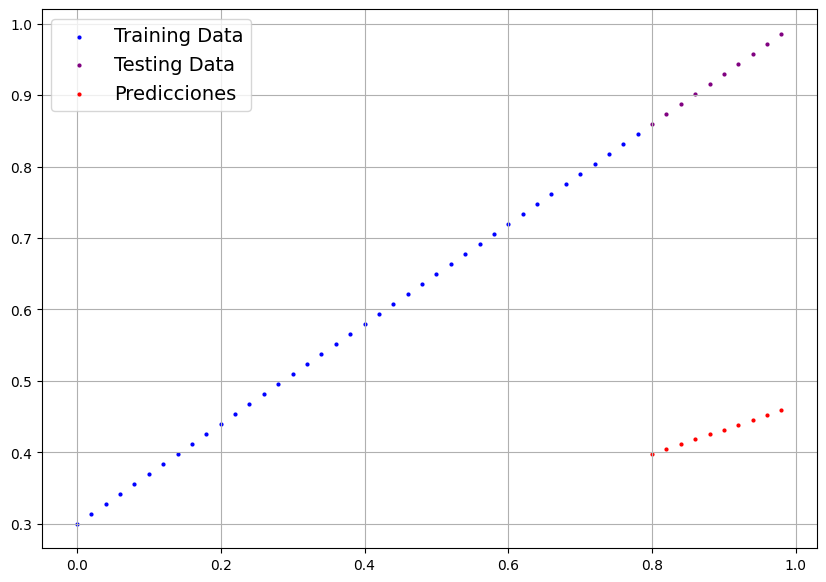

In [26]:
plot_predictions(predictions=y_preds)

## 3. Entrenamiento del Modelo

El propósito del entrenamiento del modelo es modificar sus parámetros (inicializados con valores aleatorios) hasta obtener una buena representación de la data; mejorando así la presición de la red

Una forma de definir la presición de la red es con el uso de una función de error, conocida como `loss function` (función de pérdida), `cost function` (función de costo) o `criterion`

Documentación:

* https://pytorch.org/docs/stable/nn.html#loss-functions

* https://neptune.ai/blog/pytorch-loss-functions

### Fundamentos del Entrenamiento del Modelo:

* **Loss Function**:

En concreto, una función de pérdida es una función de medición de la presición de nuestro modelo; comparando que tan erróneas son las salidas del modelo con respecto a los resultados deseados

Por lo tanto, se busca minimizar ésta función utilizando distintos métodos y algoritmos, como:

* Gradient Descent (Descenso del Gradiente)

https://www.youtube.com/watch?v=IHZwWFHWa-w

* Backpropagation (Retropropagación)

https://www.youtube.com/watch?v=Ilg3gGewQ5U

https://www.youtube.com/watch?v=tIeHLnjs5U8

* **Optimizer**

Los optimizadores son utilizados, en general, en todo Machine Learning. 

Toma en consideración la pérdida de un modelo y ajusta sus parámetros (weights y bias, en nuestro caso) para mejorar la función de pérdida (minimizarla)

Documentación: https://pytorch.org/docs/stable/optim.html

* **Testing and Training Loop**:

Para PyTorch, se necesita hacer uso de un ciclo de entrenamiento y uno de pruebas

### Loss Functions:

Documentación:

https://pytorch.org/docs/stable/nn.html#loss-functions

Dentro de la documentación de Pytorch para las funciones de error (loss function) se encuentran las siguientes:

| **Función de Pérdida**       | **Descripción**                                                                                  | **Uso Común**                                     | **Parámetros Clave**              |
|------------------------------|--------------------------------------------------------------------------------------------------|--------------------------------------------------|------------------------------------|
| `nn.MSELoss`                 | Error cuadrático medio (Mean Squared Error). Calcula la media de los cuadrados de las diferencias entre el input y el target. | Problemas de regresión.                         | `reduction`: `'mean'`, `'sum'`.   |
| `nn.L1Loss`                  | Pérdida absoluta media. Calcula la media de las diferencias absolutas entre el input y el target. | Problemas de regresión.                         | `reduction`: `'mean'`, `'sum'`.   |
| `nn.SmoothL1Loss`            | Mezcla de MSE y L1 Loss para manejar outliers de manera más estable.                          | Regresión robusta.                              | `beta`, `reduction`.              |
| `nn.HuberLoss`               | Combina propiedades de MSE y L1 para ser más robusta a outliers.                              | Regresión robusta.                              | `delta`, `reduction`.             |
| `nn.CrossEntropyLoss`        | Combina `LogSoftmax` y `NLLLoss` para clasificación multiclase.                                | Clasificación multiclase.                        | `weight`, `ignore_index`, `reduction`. |
| `nn.NLLLoss`                 | Negative Log Likelihood Loss.                                                                  | Clasificación multiclase con `LogSoftmax`.      | `weight`, `ignore_index`, `reduction`. |
| `nn.MultiMarginLoss`         | Pérdida multicategoría con márgenes.                                                          | Clasificación multiclase.                       | `p`, `margin`, `weight`, `reduction`. |
| `nn.BCELoss`                 | Binary Cross Entropy Loss.                                                                     | Clasificación binaria.                          | `weight`, `reduction`.            |
| `nn.BCEWithLogitsLoss`       | Combina una capa de sigmoid y `BCELoss` para estabilidad numérica.                            | Clasificación binaria.                          | `weight`, `pos_weight`, `reduction`. |
| `nn.MultiLabelMarginLoss`    | Pérdida basada en márgenes para etiquetas multilabel.                                          | Clasificación multilabel.                       | `reduction`.                      |
| `nn.MultiLabelSoftMarginLoss`| Pérdida basada en etiquetas multilabel usando sigmoid.                                         | Clasificación multilabel.                       | `weight`, `reduction`.            |
| `nn.MarginRankingLoss`       | Pérdida basada en márgenes entre pares de datos.                                              | Aprendizaje de rankings.                        | `margin`, `reduction`.            |
| `nn.TripletMarginLoss`       | Calcula la pérdida para embeddings usando anclajes, positivos y negativos.                    | Aprendizaje de métricas.                        | `margin`, `p`, `eps`, `swap`, `reduction`. |
| `nn.CosineEmbeddingLoss`     | Pérdida basada en similitud de coseno entre pares de vectores.                                | Clasificación con embeddings.                   | `margin`, `reduction`.            |
| `nn.KLDivLoss`               | Divergencia Kullback-Leibler entre distribuciones.                                             | Modelos probabilísticos.                        | `log_target`, `reduction`.        |
| `nn.HingeEmbeddingLoss`      | Pérdida para clasificación binaria cuando los targets son `1` o `-1`.                         | Detección de outliers, clasificación binaria.   | `margin`, `reduction`.            |
| `nn.CTCLoss`                 | Connectionist Temporal Classification Loss, usada en secuencias de longitud variable.          | Reconocimiento de voz, OCR.                     | `blank`, `reduction`, `zero_infinity`. |


#### Mean Absolute Error (`torch.nn.L1Loss`)

Expresado de la siguiente forma:

$$MAE = \frac{1}{n} \sum_i^{n} \left|\hat{y_i} - y_i \right|$$

Donde:

* MAE: Error absoluto medio

* n: Número de observaciones

* $y_i$: Valor real o deseado para el i-ésimo data point

* $\hat{y_i}$: Predicción del i-ésimo data point

Dentro de PyTorch se puede implementar de 2 formas distintas:

1) `MAE_loss = torch.mean(torch.abs(y_pred - y_test))`

2) `MAE_loss = torch.nn.L1Loss`

Sin embargo, se recomienda usar la 2da opción debido a que ésta se encuentra optimizada


### Optimizer:

Documentación: 

https://pytorch.org/docs/stable/optim.html

Dentro de la documentación de Pytorch para los optimizadores (optimizer) se encuentran los siguientes:


| **Optimizador**       | **Descripción**                                                                 | **Uso Común**                         | **Parámetros Clave**                                 |
|-----------------------|---------------------------------------------------------------------------------|---------------------------------------|-----------------------------------------------------|
| `torch.optim.SGD`     | Descenso de gradiente estocástico, con soporte para momentum y peso decay.      | Problemas generales de optimización.  | `lr`, `momentum`, `weight_decay`, `nesterov`.       |
| `torch.optim.Adam`    | Combina las ventajas de AdaGrad y RMSProp; popular para redes neuronales.       | Entrenamiento general de redes.       | `lr`, `betas`, `eps`, `weight_decay`, `amsgrad`.    |
| `torch.optim.AdamW`   | Variante de Adam que implementa decaimiento del peso de forma correcta.         | Modelos de Transformers.              | `lr`, `betas`, `eps`, `weight_decay`, `amsgrad`.    |
| `torch.optim.RMSprop` | Optimización basada en gradientes con suavizado de tasas de aprendizaje.        | Modelos RNN y redes profundas.        | `lr`, `alpha`, `eps`, `weight_decay`, `momentum`.   |
| `torch.optim.Adagrad` | Ajusta la tasa de aprendizaje individualmente para cada parámetro.              | Modelos con alta dimensionalidad.     | `lr`, `lr_decay`, `weight_decay`, `eps`.           |
| `torch.optim.Adadelta`| Variante de Adagrad con mayor flexibilidad y sin acumulación de gradientes.     | Modelos con gradientes escasos.       | `lr`, `rho`, `eps`, `weight_decay`.                |
| `torch.optim.ASGD`    | Promedio estocástico acelerado. Mejora la generalización en algunos problemas.  | Modelos con problemas de convergencia.| `lr`, `lambd`, `alpha`, `t0`, `weight_decay`.       |
| `torch.optim.LBFGS`   | Método de optimización de segundo orden, para problemas pequeños.               | Modelos con pocos parámetros.         | `lr`, `max_iter`, `max_eval`, `history_size`.       |
| `torch.optim.SparseAdam` | Variante de Adam para tensores dispersos.                                     | Modelos con gradientes dispersos.     | `lr`, `betas`, `eps`.                              |
| `torch.optim.NAdam`   | Adam con decaimiento de Nesterov.                                               | Redes profundas con convergencia lenta.| `lr`, `betas`, `eps`, `weight_decay`.              |
| `torch.optim.Rprop`   | Optimización por propagación de resiliencia (resilient backpropagation).        | Redes neuronales pequeñas.            | `lr`, `etas`, `step_sizes`.                        |


Cada uno se utiliza para casos distintos, sin embargo, debido a que todos son algoritmos poderosos y muy probados, es posible experimentar con distintos algoritmos. 

El más popular es `SGD` ó `torch.optim.SGD`, el cual resulta ser una implementación del método de gradiente descendiente estocastico (`stochastic gradient descent`).

`SGD` inicializa los parámetros (weights y bias) con valores aleatorios y trata de ajustarlos aleatoriamente para mejorar la representación de la data y, por ende, la presición del modelo. Una vez encuentre valores que minimize la función de pérdida, continua ajustando los parámetros en esta dirección.

Indagar en la documentación: https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD

### ¿Cual función de pérdida y optimizador utilizar?

En general se eligen de acuerdo al problema a modelar, conforme se haga uso de ellos se entenderá mejor el uso particula de cada uno.

Por ejemplo:

* Regresión Lineal:

Se suelen utilizar `torch.nn.L1Loss()` y `torch.optim.SGD()` respectivamente

* Clasificación:

Para un problema de clasificación como pude ser de imágenes se puede utilizar una función de pérdida `Binary Cross Entropy Loss` declarada como `torch.nn.BCELoss()`

### Setup Loss Function and Optimizer

Revisar los parámetros del modelo:

In [27]:
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [28]:
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Para crear la función de pérdida utilizamos: `torch.nn.L1Loss()`

In [29]:
# Crear función de pérdidas
loss_fn = nn.L1Loss()
loss_fn

L1Loss()

Mientras que para el optimizador usamos el de gradiente descendiente estocástico SGD: `torch.optim.SGD()`

Este método toma los siguiente parámetos:

* `params`: 

Parámetros del modelo creado. 

Podemos acceder con `model.parameters()` o visualizarlos con `model.state_dict()`

* `lr`: 

Learning rate 

Determina que tanto se modifican los parámetros del modelo por cada iteración de entrenamiento. Mientras mayor sea, más se modificarán los parámetros cada iteración.

En un "hiper-parámetro" el cual definimos nosotros, sin embargo, algunos valores comunes son: 0.1, 0.01, 0.001 y 0.0001

In [30]:
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Crear un Training Loop y un Testing Loop en PyTorch

Para ello necesitamos:

0. Iterar la data y realizar los pasos 1-5:

Para ello se hace uso de `epochs`, un epoch es una vuelta a través de la data utilizando un loop.

Son hiper-parámetros debido a que lo definimos nosotros.

1. `Forward pass`:

Involucra pasar la data a través del método `forward()` de nuestro modelo para realizar predicciones.

También conocido como `forward propagation`.

2. Calcular la pérdida:

Comparar la predicciones realizadas por `forward pass` con respecto a los resultados deseados.

3. `Optimizer Zero Grad`:

Conforme se realiza el loop de entrenamiento, los cambios realizados en el optimizador se irán acumulando por defecto. 

Para evitar esto debemos hacerlos nulos usando `optimizer.zero_grad()`.

4. `Loss Backward`:

Movimiento hacia atrás de la red para calcular los gradientes de cada parámetro de nuestro modelo con respecto a la pérdida.

En concreto, es el algoritmo de retropropagación `Backpropagation`

5. `Optimizer Step`:

Utilizar el optimizador para ajustar los parámetros del modelo con el propósito de minimizar la pérdida.

Y este es el algoritmo de descenso de gradiente `Gradient Descent`

Antes del entrenamiento los parámetros tienen esta forma:

In [31]:
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [32]:
# Definimos una semilla para tener reproducibilidad (Optativo)
torch.manual_seed(42)

# Creación del loop de ENTRENAMIENTO
# También lo usaremos para TESTING
epochs = 200
#epochs = 10000

# Trackear distintos valores
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):

    # ENTRENAMIENTO

    model0.train()

    train_pred = model0(X_train)

    loss = loss_fn(train_pred, y_train)
    # print(f"Loss: {loss}") # Verificar pérdida (Optativo)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # TESTING:

    model0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_pred = model0(X_test) 

        # 2. Calcular pérdida:
        test_loss = loss_fn(test_pred, X_test)

    if epoch % 10 == 0:

        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)

        print(f"Epoch: {epoch} | MAE Training Loss: {loss} | MAE Test Loss: {test_loss}")
        print(f"Parámetros del modelo: \n{model0.state_dict()}")
        print("\n") 
        
print(f"Epoch: {epoch} | MAE Training Loss: {loss} | MAE Test Loss: {test_loss}")
print(f"Parámetros del modelo: \n{model0.state_dict()}")

Epoch: 0 | MAE Training Loss: 0.31288138031959534 | MAE Test Loss: 0.4480651915073395
Parámetros del modelo: 
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])


Epoch: 10 | MAE Training Loss: 0.1976713240146637 | MAE Test Loss: 0.3133552074432373
Parámetros del modelo: 
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])


Epoch: 20 | MAE Training Loss: 0.08908725529909134 | MAE Test Loss: 0.18429657816886902
Parámetros del modelo: 
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])


Epoch: 30 | MAE Training Loss: 0.053148526698350906 | MAE Test Loss: 0.11164019256830215
Parámetros del modelo: 
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])


Epoch: 40 | MAE Training Loss: 0.04543796554207802 | MAE Test Loss: 0.08060953766107559
Parámetros del modelo: 
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])


Epoch: 50 | MAE Training Loss: 0.04167863354086876 | MAE Test Loss: 

In [33]:
print(f"Pérdida del modelo: {loss}")
print(f"Parámetros del modelo: {model0.state_dict()}")
print(f"Parámetros deseados: weight = {weight}, bias = {bias}")

Pérdida del modelo: 0.0025885067880153656
Parámetros del modelo: OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Parámetros deseados: weight = 0.7, bias = 0.3


En concreto, el loop de entrenamiento está conformado de lo siguiente:

* Definir epochs y crear el loop: 

Cuantas iteraciones realizará el ciclo

* Activar modo de entrenamiento: 

Usando `model.train()` para obligar que se requieran los gradientes en cada instancia que sea posible.

Documentación: https://pytorch.org/tutorials/beginner/introyt/trainingyt.html

* Realizar forward dando nuestra data al modelo: 

Pasar la data al modelo, para que realice su método `forward()` definido dentro de la clase modelo para la instancia utilizada.

* Calcular las pérdidas del modelo: 

Antes del ciclo elegir una función de pérdida y definirla, en este caso: 

`loss_fn = torch.nn.L1Loss()`

Dentro del ciclo, evaluar las predicciones con los datos de entrenamiento esperados: 

`loss = loss_fn(y_preds - y_train)`

* Denifir optimizador y hacer nulos los cambios al optimizador:

Antes del ciclo se elige un optimizador y se define, en este caso como: 

`optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.001)`

Dentro del ciclo, durante cada iteración se modificará el optimizador y éstos cambios se acumularán, por lo tanto, se define `optimizer.zero_grad()` para hacerlos nulos en cada iteración.

* Backpropagation en la función de pérdida:

Se realiza el Backpropagation en la función de pérdida con respecto a los parámetros, usando: 

`loss.backward()`

En concreto, se computa el gradiente en cada parámetro con `requires_grad = True`

* Avanzar en pasos con el optimizador:

En cada iteración se hace un paso para llegar a mínimo. Mientras más nos acerquemos al mínimo, menor deben ser los pasos para no pasarnos del valor buscado.

Se utiliza: `optimizer.step()`

En otras palabras, se toma un paso con el optimizador con el objetivo de buscar el mínimo de la función de pérdida, actualizando los parámetros del modelo con respecto a los gradientes calculados con `loss.backward()`

* Apagar el modo entrenamiento:

Para ello se utiliza `model.eval()`

Documentación: https://discuss.pytorch.org/t/where-to-use-model-eval/89200

Queremos que los parámetros se conviertan en:

In [34]:
weight, bias

(0.7, 0.3)

Una vez ejecutado el loop de entrenamiento:

In [35]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

Los parámetros cambiaron en una medida de 0.001 para aproximarse a los deseados (0.7 para el peso y 0.3 para el bias).

Debido a que el número de epochs (iteraciones del loop) es tan mínimo (solo fue 1) seguimos muy alejados de los valores deseados.

## 4. Predicciones y Evaluación del Modelo

Realizando predicciones después de 200 epochs:

In [36]:
with torch.inference_mode():
    y_preds_new = model0(X_test)
y_preds_new # Predicciones con 200 epochs

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [37]:
y_test # Datos de entrenamiento (valores esperados)

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

Comparación de gráficas:

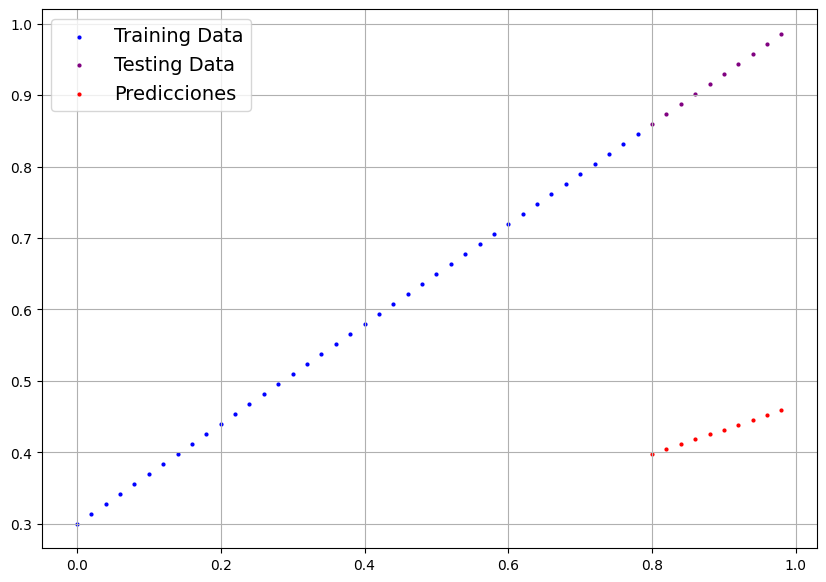

In [38]:
plot_predictions(predictions=y_preds) # Antes de entrenamiento

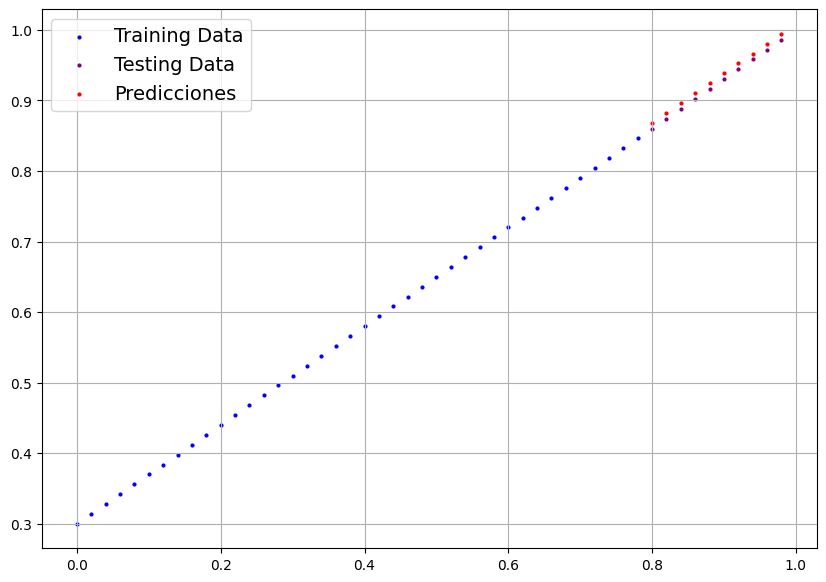

In [39]:
plot_predictions(predictions=y_preds_new) # Después de 200 epochs de entrenamiento

Evidentemente, nuestras predicciones mejoraron, sin embargo, hacen falta más ciclos de entrenamiento para tener una presición aceptable

### Plot Loss Curves

In [40]:
epoch_count[:5], loss_values[:5], test_loss_values[:5]

([0, 10, 20, 30, 40],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>)],
 [tensor(0.4481),
  tensor(0.3134),
  tensor(0.1843),
  tensor(0.1116),
  tensor(0.0806)])

In [41]:
epoch_count[-5:], loss_values[-5:], test_loss_values[-5:]

([150, 160, 170, 180, 190],
 [tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(0.0207),
  tensor(0.0256),
  tensor(0.0280),
  tensor(0.0280),
  tensor(0.0280)])

Debido a que se sigue trackeando el gradiente en loss_values, debemos transformar el tensor a un arreglo de numpy para poder graficarlo:

In [42]:
loss_values_np = np.array(torch.tensor(loss_values).numpy())
loss_values_np[:5]

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797],
      dtype=float32)

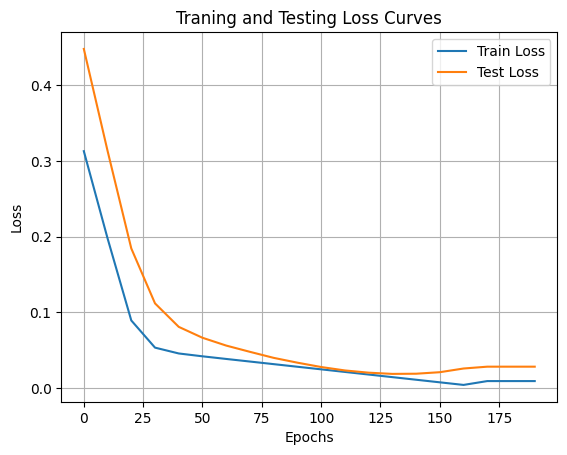

In [43]:
plt.plot(epoch_count, loss_values_np, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Traning and Testing Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.grid(True)

## 5. Guardar y Cargar un Modelo

Existe 3 métodos principales para guardar y cargar modelos en PyTorch:

1. `torch.save()`:

Permite guardar un objeto de PyTorch en el formato "pickle" de Python.

Documentación de Python: https://docs.python.org/3/library/pickle.html

2. `torch.load()`:

Permite cargar un objeto guardado de PyTorch.

3. `torch.nn.Module.load_state_dict()`:

Permite cargar el `state_dict` de un modelo.

`state_dict()` es un diccionario de Python que mapea cada layer de un modelo a su tensor de parámetros.

Cabe mencionar que el optimizador también tiene un `state_dict`, por ejemplo:

`optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)`

`optimizer.state_dict()`

In [44]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [45]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'fused': None,
   'params': [0, 1]}]}

Documentación de PyTorch:

https://pytorch.org/tutorials/beginner/saving_loading_models.html

### Método Recomendado:

La forma recomendada de guardar y cargar modelos es a través de su `state_dict`, usando:

* Guardar:

`torch.save(model.state_dict(), PATH)`

* Cargar: 

`model = TheModelClass(*args, **kwargs)`

`model.load_state_dict(torch.load(PATH))`

`model.eval()`

### Guardar y Cargar el Modelo Entero:

Existe también otro método, por el cual se guarda el modelo entero, de la siguiente forma:

* Guardar:

`torch.save(model, PATH)`

* Cargar:

Para hacer uso de este método, debe de estar definida la clase del modelo.

`model = torch.load(PATH)`

`model.eval()`

### Ejemplo

#### Guardar Modelo

In [46]:
import os

In [47]:
root_dir = os.path.abspath(os.path.join(os.getcwd(), loaded_model0 = torch.load()
                                        "../../modelos"))
root_dir

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3644826058.py, line 1)

In [48]:
model_path = os.path.join(root_dir, 
                          "02_pytorch_workflow_model0.pth")
model_path

'/home/miguel/Documents/Udemy/pytorch-fundamentals/modelos/02_pytorch_workflow_model0.pth'

In [49]:
torch.save(model0.state_dict(), model_path)

#### Cargar Modelo

Debido a que guardamos el `state_dict` del modelo, en lugar del modelo entero debemos crear una nueva instancia de la clase del modelo y luego cargar el `state_dict` del modelo guardado.

Recordando la forma del `state_dict` del modelo guardado:

In [50]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

Creamos una nueva instancia del la clase LinearRegressionModel:

In [52]:
loaded_model0 = LinearRegressionModel()
loaded_model0.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

Cargamos el `state_dict` del modelo guardado (model0)

In [53]:
loaded_model0.load_state_dict(torch.load(model_path))

/tmp/ipykernel_11502/184014497.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model0.load_state_dict(torch.load(model_path))


<All keys matched successfully>

In [54]:
loaded_model0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

A continuación realizaremos predicciones utilizando el modelo cargado para comprobar que no existan problemas

In [55]:
loaded_model0.eval()
with torch.inference_mode():
    loaded_model0_preds = loaded_model0(X_test)
loaded_model0_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

Comparación de predicciones entre el modelo original (model0) y el modelo cargado (loaded_model0):

In [58]:
loaded_model0_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])